In [3]:
import anndata 
import pandas as pd
import scanpy as sc
import pybedtools

from ALLCools.plot import categorical_scatter,continuous_scatter
import matplotlib.pyplot as plt
from ALLCools.clustering import \
    tsne, \
    significant_pc_test, \
    filter_regions, \
    remove_black_list_region, \
    lsi, \
    binarize_matrix
import joblib
from amb import *
from ALLCools.clustering import *
import numpy as np

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

age_palette = get_age_palette()
age_palette['8wk'] = age_palette['2mo']

ct_palette = joblib.load('/home/qzeng_salk_edu/project/240319_te/AgingMajorType_Palette')
# replace the keys by .apply(lambda x: x.replace(' ','_').replace('/',''))
ct_palette = {x.replace(' ','_').replace('/',''):y for x,y in ct_palette.items()}

region_palette = get_major_region_palette()

In [4]:
ct_palette = joblib.load('/home/qzeng_salk_edu/project/240319_te/AgingMajorType_Palette')
# replace the keys by .apply(lambda x: x.replace(' ','_').replace('/',''))
ct_palette = {x.replace(' ','_').replace('/',''):y for x,y in ct_palette.items()}


In [5]:
from amb import *
age_palette = get_age_palette()
age_palette['8wk'] = age_palette['2mo']

In [6]:
mc_type = 'CGN'
te_class = 'SINE'
inout='out20'

In [7]:
meta = pd.read_csv('/data/metadata/240104_m3C_META.csv', index_col =0)
meta['AgingMajorType'] = meta['AgingMajorType'].apply(lambda x: x.replace(' ','_').replace('/',''))
meta.head()

,InputReadPairs,InputReadPairsBP,TrimmedReadPairs,R1WithAdapters,R1QualTrimBP,R1TrimmedReadsBP,R2WithAdapters,R2QualTrimBP,R2TrimmedReadsBP,UniqueMappedReads,...,DissectionRegion,Region,Replicate,l1,mc_m3c-co_cluster_l1,mc_m3c-co_cluster_l2,CellType,CellSubclass,AgingMajorType,Class
cell,,,,,,,,,,,,,,,,,,,,,
AMB_220628_18mo_3F_4E_1_P1-1-I3-A1,1710943,516615812,1710512,309,766343,216480647,874,649089,230238965,1870858,...,ACB-1+ACB-2,Nucleus_accumbens,rep2,13,23,0-0,STR D1 Gaba,STR D1 Gaba,STR_D1_Gaba,Gaba
AMB_220628_18mo_3F_4E_1_P1-1-I3-A13,1688475,510130057,1688130,316,725418,213815592,832,673498,227339515,1820523,...,ACB-1+ACB-2,Nucleus_accumbens,rep2,11,6,12-6,STR-PAL Chst9 Gaba,STR D1 Sema5a Gaba,STR_D1_Sema5a_Gaba,Gaba
AMB_220628_18mo_3F_4E_1_P1-1-I3-A14,2158376,651979882,2157941,456,998559,273186730,1132,869248,290536436,2374173,...,ACB-1+ACB-2,Nucleus_accumbens,rep2,8,4,2-2,Astro NN,Astro-TE NN,Astro-TE_NN,NN
AMB_220628_18mo_3F_4E_1_P1-1-I3-A2,1582810,478040623,1582446,283,708122,200329678,853,626267,213020525,1746308,...,ACB-1+ACB-2,Nucleus_accumbens,rep2,9,8,7-6,STR D2 Gaba,STR D2 Gaba,STR_D2_Gaba,Gaba
AMB_220628_18mo_3F_4E_1_P1-1-I3-B1,1766714,533610284,1766279,411,810795,223604054,1045,691737,237777442,1968711,...,ACB-1+ACB-2,Nucleus_accumbens,rep2,13,23,0-0,STR D1 Gaba,STR D1 Gaba,STR_D1_Gaba,Gaba


## clustering

In [8]:
genomepath = '/ref/m3C/mm10.main.nochrM.nochrY.chrom.sizes'
gene_bed = pybedtools.BedTool('TE_use.gencode.vM22.annotation.gene.sorted.bed')
te_bed = pybedtools.BedTool(f'/ref/repeatmasker-with-id/hg38.repeatmasker.repClass-{te_class}.bed')

In [10]:
ads = anndata.read_h5ad(f"adata/{te_class}.downsampled.h5ad")
ads

AnnData object with n_obs × n_vars = 7200 × 1510990

In [11]:
if inout=='out20':
    feats = te_bed.subtract(gene_bed.flank(b=20000, g=genomepath)).to_dataframe()['name'].tolist()
elif inout=='out10':
    feats = te_bed.subtract(gene_bed.flank(b=10000, g=genomepath)).to_dataframe()['name'].tolist()
elif inout=='out2':
    feats = te_bed.subtract(gene_bed.flank(b=2000, g=genomepath)).to_dataframe()['name'].tolist()
elif inout=='out':
    feats = te_bed.subtract(gene_bed).to_dataframe()['name'].tolist()
elif inout=='in':
    feats = te_bed.intersect(gene_bed,).to_dataframe()['name'].tolist()
else:
    feats = te_bed.to_dataframe()['name'].tolist()

In [12]:
shared_feats = list(set(feats) & set(ads.var_names))
len(shared_feats)

615036

In [13]:
# select shared features from ads
ads = ads[:,shared_feats]
ads

View of AnnData object with n_obs × n_vars = 7200 × 615036

In [14]:
sc.pp.filter_genes(ads, min_cells=1)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [15]:
pc_cutoff = 0.1
lsi(ads, algorithm='arpack', obsm='X_pca')
n_components = significant_pc_test(ads, p_cutoff=pc_cutoff, update=True)


25 components passed P cutoff of 0.1.
Changing adata.obsm['X_pca'] from shape (7200, 100) to (7200, 25)


In [16]:
resolution = 1.5
sc.pp.neighbors(ads)
sc.tl.leiden(ads, resolution=resolution)
sc.tl.umap(ads)

/var/tmp/ipykernel_563620/709457442.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(ads, resolution=resolution)


In [17]:
tsne(ads,
     obsm='X_pca',
     metric='euclidean',
     exaggeration=-1,  # auto determined
     perplexity=30,
     n_jobs=-1)


## plot

In [20]:
ads

AnnData object with n_obs × n_vars = 7200 × 365476
    obs: 'leiden', 'Region', 'hypo_te_counts'
    var: 'n_cells'
    uns: 'neighbors', 'leiden', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    obsp: 'distances', 'connectivities'

In [24]:
#ads = anndata.read_h5ad(f"adata/clustered.{te_class}.out20.tsne.h5ad")
ads.obs['Region'] = meta['Region']
ads.obs['celltype'] = meta['AgingMajorType']
ads.obs['Age'] = meta['Age']
# change ads.X to df
df = pd.DataFrame(ads.X.toarray(), index=ads.obs_names, columns=ads.var_names)
ads.obs['hypo_te_counts'] = df.sum(axis = 1)

# remove cells with cell types as DG-PIR_Ex_IMN
ads = ads[~ads.obs['celltype'].isin(['DG-PIR_Ex_IMN'])].copy()
ads

AnnData object with n_obs × n_vars = 6900 × 365476
    obs: 'leiden', 'Region', 'hypo_te_counts', 'celltype', 'hypo_te_counts_norm', 'Age'
    var: 'n_cells'
    uns: 'neighbors', 'leiden', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    obsp: 'distances', 'connectivities'

In [25]:
# normalize obs['hypo_te_counts'] within each celltype
ads.obs['hypo_te_counts_norm'] = ads.obs.groupby('celltype')['hypo_te_counts'].transform(lambda x: (x - x.mean())/x.std())
ads.obs

,leiden,Region,hypo_te_counts,celltype,hypo_te_counts_norm,Age
cell,,,,,,
AMB_220405_8wk_5E_6E_1_P1-1-K15-G1,2,Caudate_Putamen,3718,Astro-TE_NN,-0.691671,8wk
AMB_220405_8wk_5E_6E_1_P1-1-K15-G2,0,Caudate_Putamen,2202,STR_D2_Gaba,-1.033069,8wk
AMB_220405_8wk_5E_6E_1_P1-1-K15-N1,0,Caudate_Putamen,3099,STR_D2_Gaba,0.007856,8wk
AMB_220405_8wk_5E_6E_1_P1-1-K15-N14,0,Caudate_Putamen,3136,STR_D2_Gaba,0.050793,8wk
AMB_220405_8wk_5E_6E_1_P1-2-K15-A3,0,Caudate_Putamen,2217,STR_D1_Gaba,-1.013335,8wk
...,...,...,...,...,...,...
AMB_220707_18mo_2A_3A_1_P2-4-E5-B8,0,Frontal_Cortex,2695,STR_D2_Gaba,-0.460966,18mo
AMB_220707_18mo_2A_3A_1_P2-4-E5-C19,5,Frontal_Cortex,6128,Microglia_NN,0.030035,18mo
AMB_220707_18mo_2A_3A_1_P2-4-E5-I19,0,Frontal_Cortex,2857,STR_D1_Gaba,-0.154338,18mo


/opt/conda/lib/python3.10/site-packages/ALLCools/plot/text_anno_scatter.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for text, sub_df in data.groupby(anno_col):


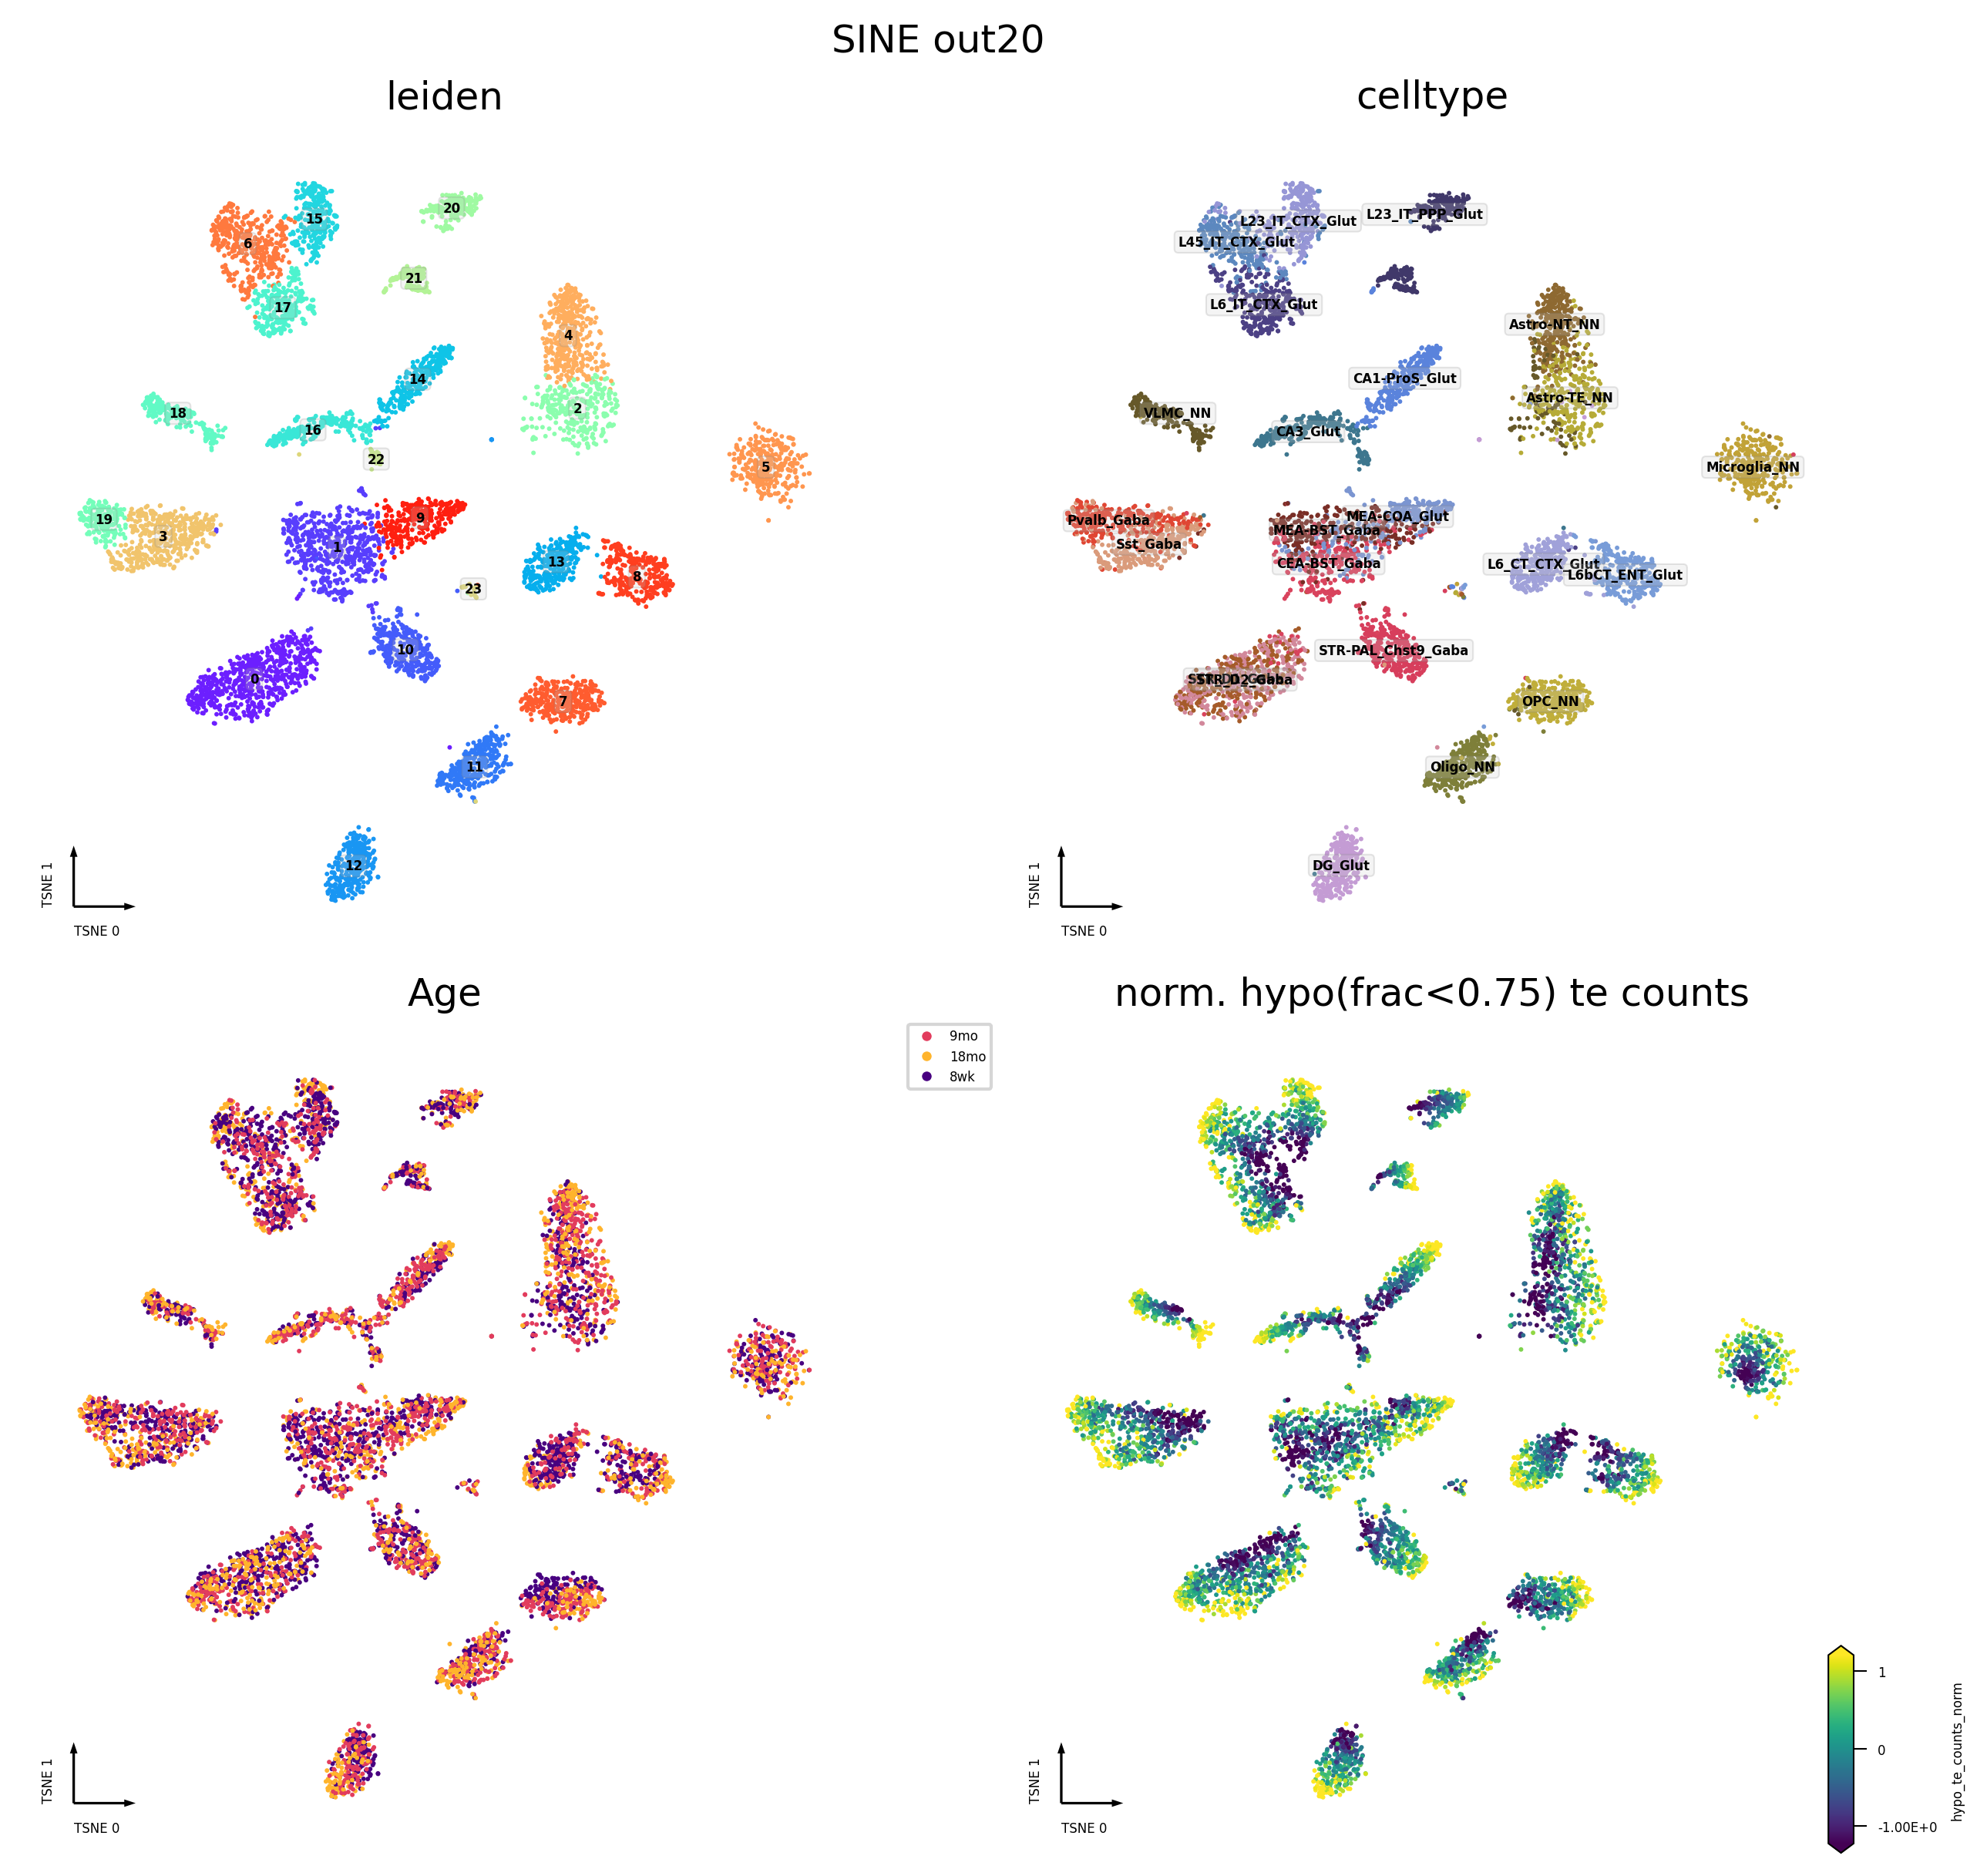

In [27]:
fig, axes = plt.subplots(figsize=(8, 8),ncols = 2,nrows = 2,  dpi=300, constrained_layout=True)
ax = axes[0,0]
categorical_scatter(data=ads,
                    ax=ax, 
                    coord_base='tsne', 
                    hue='leiden', 
                    rasterized= True,
                    text_anno = 'leiden',
                    show_legend=False
                    )

ax.set_title(f"leiden")

ax = axes[0,1]
categorical_scatter(data=ads, 
                    ax=ax, 
                    coord_base='tsne', 
                    hue='celltype', 
                    text_anno = 'celltype',
                    rasterized= True,
                    #show_legend=True, 
                    palette=ct_palette   #_palette
                    )
ax.set_title(f"celltype")                    

ax = axes[1,0]
categorical_scatter(data=ads, 
                   ax=ax, 
                   coord_base='tsne', 
                   hue='Age', 
                   #text_anno = 'Age',
                   rasterized= True,
                   show_legend=True, 
                   palette=age_palette)
ax.set_title(f"Age")  

ax = axes[1,1]
continuous_scatter(data=ads, 
                   ax=ax, 
                   coord_base='tsne', 
                   hue='hypo_te_counts_norm', 
                   hue_norm=(np.percentile(ads.obs['hypo_te_counts_norm'], 10), np.percentile(ads.obs['hypo_te_counts_norm'], 90)),
                   )
ax.set_title(f"norm. hypo(frac<0.75) te counts")  

plt.suptitle(f"{te_class} {inout}")
fig.savefig(f"figure/{te_class}.{inout}.tsne.pdf", bbox_inches='tight')

In [28]:
ads.write_h5ad(f"adata/clustered.{te_class}.{inout}.tsne.h5ad")

## get the overlap score

In [37]:
from ALLCools.integration.metric import calculate_alignment_score
import seaborn as sns

In [38]:
coord_base = 'tsne'
leiden_alignment_scores = {}

for leiden, leiden_df in ads.obs.groupby("celltype"):
    leiden_adata = ads[leiden_df.index, :]
    k = int(leiden_adata.obs.shape[0] * 0.01)
    k = max(k, 20)
    print(leiden, k)
    overall_alignment, alignment_per_dataset = calculate_alignment_score(
        leiden_adata, dataset_col="Age", obsm_key=f"X_{coord_base}", k=k)
    leiden_alignment_scores[leiden] = overall_alignment
    
leiden_alignment_scores = pd.Series(leiden_alignment_scores)#

/var/tmp/ipykernel_563620/2805894718.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for leiden, leiden_df in ads.obs.groupby("celltype"):


Astro-NT_NN 20


/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}


Astro-TE_NN 20
CA1-ProS_Glut 20
CA3_Glut 20


/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}


CEA-BST_Gaba 20
DG_Glut 20
L6_CT_CTX_Glut 20


/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}


L6_IT_CTX_Glut 20
L6bCT_ENT_Glut 20
L23_IT_CTX_Glut 20


/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}


L23_IT_PPP_Glut 20
L45_IT_CTX_Glut 20
MEA-BST_Gaba 20


/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}


MEA-COA_Glut 20
Microglia_NN 20
OPC_NN 20


/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}


Oligo_NN 20
Pvalb_Gaba 20
STR-PAL_Chst9_Gaba 20


/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}


STR_D1_Gaba 20
STR_D2_Gaba 20
Sst_Gaba 20
VLMC_NN 20


/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}
/opt/conda/lib/python3.10/site-packages/ALLCools/integration/metric.py:168: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["alignment_score"] = {"overall": overall_alignment, "overall_per_dataset": alignment_per_dataset}


In [39]:
leiden_alignment_scores.sort_values().to_csv(f"{te_class}.{inout}.{coord_base}.alignment_score.csv")

In [40]:
leiden_alignment_scores  = pd.read_csv(f"{te_class}.{inout}.{coord_base}.alignment_score.csv", index_col = 0)
scores = []
score = leiden_alignment_scores.copy()
score = score.reset_index()
score.columns = ["celltype", "score"]
scores.append(score)

/var/tmp/ipykernel_563620/3012168992.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=data, x="score", y= "celltype", palette=ct_palette)


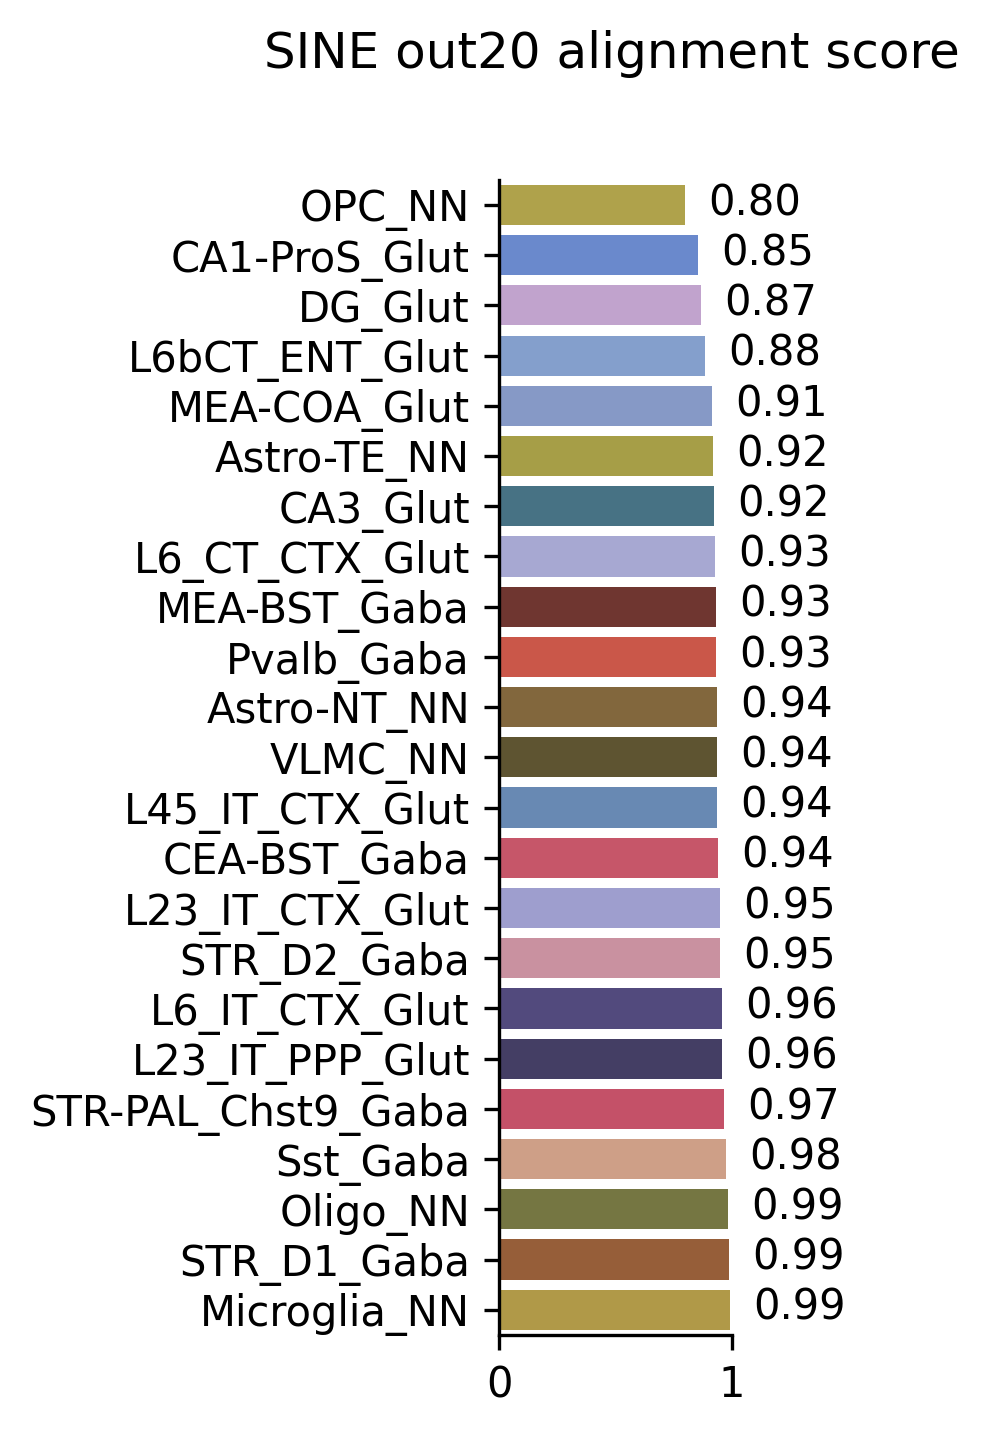

In [41]:
fig = plt.figure(figsize=(1, 5), dpi=300)

gs = fig.add_gridspec(len(scores), 1, height_ratios=[df.shape[0] for df in scores], hspace=0.01)

axes = [fig.add_subplot(gs[i, 0]) for i in range(len(scores))]

for i, (ax, data) in enumerate(zip(axes, scores)):
    if i != len(scores) - 1:
        last = False
    else:
        last = True
    sns.barplot(ax=ax, data=data, x="score", y= "celltype", palette=ct_palette)
    for y, (region, score) in data.iterrows():
        ax.text(x=score + 0.1, y=y+0.2, s=f"{score:.2f}")
    ax.set(xlabel="", ylabel="", xlim=(0, 1))
    if not last:
        ax.set(xticks=[])
    sns.despine(ax=ax, bottom=False if last else True)

# add a title
fig.suptitle(f"{te_class} {inout} alignment score")
fig.savefig(f"figure/{te_class}_{inout}_alignment_bar.pdf", bbox_inches="tight")